# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy`

Considere una cruz simétrica inscrita en un círculo de radio $r$

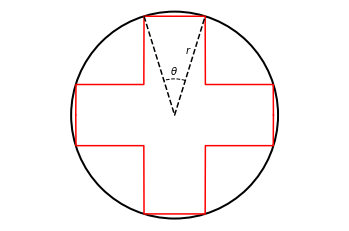

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

ct = np.cos(0.3)
st = np.sin(0.3)
x = np.linspace(-ct,ct,1000)
y = np.zeros(np.shape(x))
y[1:500] = [st if i < -st else ct for i in x[1:500]]
y[500:999] = [st if i > st else ct for i in x[500:999]]

p = patches.Circle((0, 0), 1,fc='w',lw=2,color='k')
ax = plt.gca()
ax.add_artist(p)
plt.text(0.1,0.6,'$r$')

plt.plot(x,y,'r')
plt.plot(x,-y,'r')

plt.plot([-st,0,st],[ct,0,ct],'k--')
plt.text(-0.04,0.4,r'$\theta$')
a = patches.Arc((0, 0),0.7,0.7,90,theta1=-0.3*180/np.pi,theta2=0.3*180/np.pi,
                fc='w',color='k',ls='--')
ax.add_artist(a)

plt.axis([-1,1,-1,1])
plt.axis('equal')
plt.axis('off')
#plt.tight_layout()
plt.show()

1. Escribir el área $A$ de la cruz como una función de $\theta$. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*.
2. Determinar el valor de $\theta$ que maximiza el área para un radio $r=2$.
3. ¿Cuál es el área máxima de la cruz?

**Pista:** Divida la cruz en cuatro partes iguales determinadas por los ejes $x$ y $y$. El resto es trigonometría básica.

In [165]:
import sympy as sp
import math as mt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Dividimos la cruz dada 

Para desarrollar la fórmula de la cruz ya divida, conseguimos la siguiente fórmula base -> $ A = 4ab - a^2 $

 ### Depués, obtenemos nuestras fórmulas tanto de **"a"** como de **"b"**

* Se utilizaron leyes trigonométricas para poder obtener a y b. 
Se partió el triángulo dado a la mitad para ver lo que es el cateto
adyacente, el opuesto y la hipotenusa 

### ¿Cómo podemos definir estos datos?

* Cateto Opuesto -> a / 2 
* Cateto Adyacente -> b
* Hipotenusa -> r
* Ángulo theta -> $ \fracc {\theta}{2} $


### Después, utilizamos lo que es la ley de seno 

$ sen( \theta ) = {co \over h} $

Para después sustituir con los valores obtenidos
$$ sen(\theta) = \frac{\theta}{2} = \frac{a / 2} {r} $$

### Y para obtener a se despejó

$$ sen \frac{\theta}{2} * r = \frac {a}{2} $$

### Y nos queda así

$$ 2r sen \frac{\theta}{2} = a $$

In [170]:
import math as mt

In [160]:
ac = 2*(2**2)*(2*sp.sin("theta")+sp.cos("theta")-1)
ac

16*sin(theta) + 8*cos(theta) - 8

In [161]:
df = sp.diff(ac, "theta")
df

-8*sin(theta) + 16*cos(theta)

### Punto crítico 

In [173]:
puntoc = sp.solve(df, "theta")
puntoc

[atan(2)]

### ¿Qué quedó de resultado?

In [174]:
mt.atan(2)

1.1071487177940906

$$ artan(2) = 1.1071487177940906 $$

### Y nuestra área máxima es 

In [172]:
ac = 2*(2**2)*(2*sp.sin(1.10711487177940904)+sp.cos(1.1071487177)-1)
ac 

9.88830163010801

$$ Área -> 9.88830163010801cm^2 $$

---
# Segundo punto. Programación lineal

Un empresario pretende fabricar dos tipos de congeladores denominados A y B. Cada uno de ellos debe pasar por tres operaciones antes de su comercialización: 
<table>
  <tr>
      <th></th>
      <th>Ensamblaje</th>
      <th>Pintura</th>
      <th>Calidad</th>
  </tr>
  <tr>
      <th>Congeladores tipo A</th>
      <td>2.5 horas</td>
      <td>3 kg</td>
      <td>14 horas</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Congeladores tipo B</th>
      <td>3 horas</td>
      <td>6 kg</td>
      <td>10 horas</td>
  </tr>
  <tr>
      <td>Disponibilidad</td>
      <td>4500 horas</td>
      <td>8400 kg</td>
      <td>20000 horas</td>
  </tr>
</table>

El empresario dispone semanalmente de:

* Máximo 4500 horas para ensamblaje
* Máximo 8400 Kg. de esmalte
* 20000 horas máximo, para control de calidad

Los costos totales de fabricación por unidad son, respectivamente, 30 y 28, y los precios de venta 52 y 48, todos ellos en miles de pesos. Además, los estudios de mercado muestran que la demanda semanal de congeladores no supera las 1700 unidades y que, en particular, la de tipo A es de, al menos 600 unidades.

<table>
  <tr>
      <th></th>
      <th>Costo</th>
      <th>Precio de venta</th>
  </tr>
  <tr>
      <th>Congeladores tipo A</th>
      <td>30</td>
      <td>52</td>
  </tr>
  <tr>
      <th>Congeladores tipo B</th>
      <td>28</td>
      <td>48</td>
  </tr>
</table>

Se desea conocer las unidades necesarias para **maximizar** la utilidad.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad
\end{equation}
2. Resuelva el problema utilizando la función `linprog`. ¿Cuántos congeladores de cada tipo se deben producir (valores enteros)?, ¿Cuál es la ganancia?

---
# Tercer punto. Ajuste de curvas
Los siguientes datos extraidos de la Federal Reserve Economic Data (FRED), son los salarios por empleado equivalente a tiempo completo en industrias privadas de EE.UU.: fondos, fideicomisos, etc. **entre los años 1998 y 2018**. 

https://www.quandl.com/data/FRED/N4461C0A052NBEA-Wage-and-salary-accruals-per-full-time-equivalent-employee-Domestic-private-industries-Funds-trusts-and-other-financial-vehicles 

In [1]:
import numpy as np
y=np.array([ 55887.,  59365.,  65435.,  68065.,  71918.,  77257.,  92036.,
        92645.,  99857.,  74935.,  78597.,  83134.,  87372., 104196.,
       112597., 133821., 129107., 138259., 139083., 143762., 147334.])
x=np.arange(8,29)

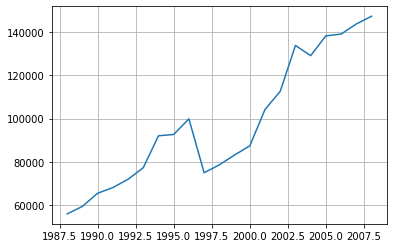

In [3]:
plt.plot(x+1980,y)
plt.grid()

1. Ajuste los salarios con polinomios de grado 1 a 3 y muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor?
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste
3. Use el modelo para averiguar el salario a mediados del año 2005 y para predecirlo en el año 2025. ¿Qué diferencias encuentra en cuanto a la interpolación (esto es, obtener un punto medio) y la extrapolación  (es decir, obtener un dato fuera del rango conocido)?

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.optimize as opt 
%matplotlib inline 
data = 21 
x = np.linspace(0, 20, data)


### Graficamos nuestro modelo 

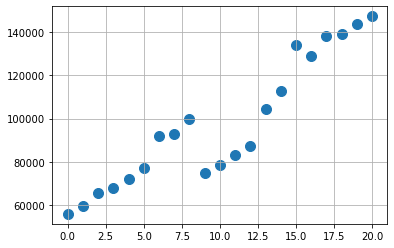

In [63]:
plt.figure()
plt.scatter(x, y, s = 100)
plt.grid()

### Definimos nuestra función para poder hacer los polinomios 

In [136]:
def fun_salario(beta, X, y) :
    beta = np.reshape(beta, [2,-1])
    prediccion = X @ beta 
    return ((y - prediccion).T @ (y - prediccion))[0][0]


### Empazamos a desarrollar los polinomios 

In [113]:

ones = np.ones([data, 1])
x1 = np.reshape(x, [data, -1])
X = np.hstack((ones, x1))
beta1 = np.random.rand(2)
fun_salario(beta_inicial, X, y)
y = np.reshape(y, [data, -1])
fun_salario(beta1, X, y)


219008819410.73087

In [129]:
sol = opt.minimize(fun_salario, beta1, args = (X,y))
sol

      fun: 1818616350.2410328
 hess_inv: array([[ 2.13101756e-01, -4.26580966e-02,  1.75676464e-03],
       [-4.26580966e-02,  1.13212674e-02, -5.22425619e-04],
       [ 1.75676464e-03, -5.22425619e-04,  2.56928127e-05]])
      jac: array([   0.,   64., 1072.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 187
      nit: 9
     njev: 44
   status: 2
  success: False
        x: array([61400.16392963,  1753.33735973,   138.34929698])

### Segundo polinomio 

In [175]:
yprediccion1 = X @ sol.x

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

In [176]:

def fun_salario(beta, X, y) :
    beta = np.reshape(beta, [3,-1])
    prediccion = X @ beta 
    return ((y - prediccion).T @ (y - prediccion))[0][0]
ones = np.ones([data, 1])
x1 = np.reshape(x, [data, -1])
x2 = np.reshape(x**2, [data, -1])
X = np.hstack( (ones, x1, x2))
beta1 = np.random.rand(3)
y = np.reshape(y, [data, -1])
fun_salario(beta1, X, y)

sol = opt.minimize(fun_salario, beta1, args = (X, y))
sol

      fun: 1818616349.7109153
 hess_inv: array([[ 5.99866536e-07, -2.80474623e-08,  5.71820581e-07],
       [-2.80474623e-08,  2.90626961e-08,  1.01524406e-09],
       [ 5.71820581e-07,  1.01524406e-09,  5.72838119e-07]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 204
      nit: 15
     njev: 51
   status: 0
  success: True
        x: array([61400.13972825,  1753.34202299,   138.34836245])

### Tecer polinomio 

In [177]:
yprediccion2 = X @ sol.x

In [178]:
def fun_salario(beta, x, y) :
    beta = np.reshape(beta, [4,-1])
    prediccion = X @ beta 
    return ((y - prediccion).T @ (y - prediccion))[0][0]
ones = np.ones([data, 1])
x1 = np.reshape(x, [data, -1])
x2 = np.reshape(x**2, [data, -1])
x3 = np.reshape(x**3, [data, -1])
X = np.hstack( (ones, x1, x2, x3))
beta1 = np.random.rand(4)
y = np.reshape(y, [data, -1])
fun_salario(beta1, X, y)

sol3 = opt.minimize(fun_salario, beta1, args = (X, y))
sol3

      fun: 1746809626.4214988
 hess_inv: array([[ 1.74141063e-03,  6.14510159e-08, -1.38844148e-06,
         1.67989225e-07],
       [ 6.14510159e-08,  5.63484270e-08, -1.96353132e-08,
         1.45485106e-09],
       [-1.38844148e-06, -1.96353132e-08,  5.44503810e-07,
        -2.76605239e-08],
       [ 1.67989225e-07,  1.45485106e-09, -2.76605239e-08,
         3.50580725e-09]])
      jac: array([  0.,   0.,   0., -32.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 362
      nit: 20
     njev: 71
   status: 2
  success: False
        x: array([ 5.77275825e+04,  4.26786817e+03, -1.83736077e+02,  1.07359031e+01])

### Graficamos 

NameError: name 'yprediccion1' is not defined

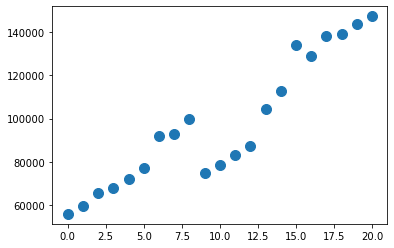

In [179]:
%matplotlib inline 
plt.figure()
plt.scatter(x, y, s = 100)
plt.plot(x, yprediccion1, "g")
plt.plot(x, yprediccion2, "y")

### Respuesta 3.

Diferencia entre extrapolación e interpolación